In [7]:
%load_ext autoreload
%autoreload 2
import torch as t
from gninvert.rule_discovery import view_run_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Stats for 20 steps for node features:
Greatest relative difference: 129.9386978149414%
Average relative difference: 113.78539204597473%
Smallest relative difference: 100.10974407196045%
Greatest absolute difference: 0.17381566762924194
Average absolute difference: 0.0726134879514575
Smallest absolute difference: 0.0004768967628479004%


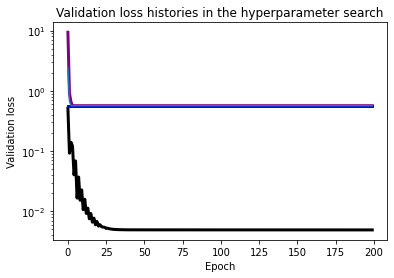

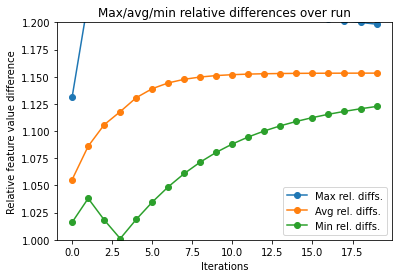

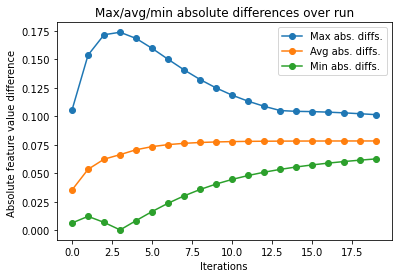

The model being tested finished the run outputting this graph:


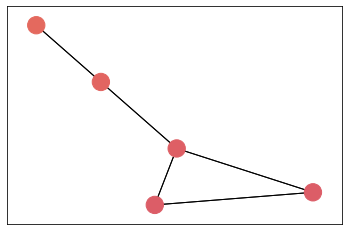

tensor([[0.5746],
        [0.5750],
        [0.5844],
        [0.6047],
        [0.6134]])
The ground truth model finished the run outputting this graph:


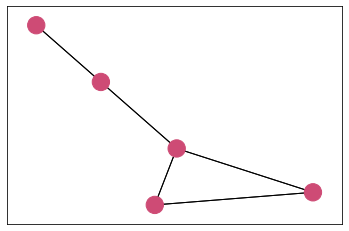

tensor([[0.5118],
        [0.5119],
        [0.5120],
        [0.5120],
        [0.5119]], grad_fn=<GeluBackward0>)


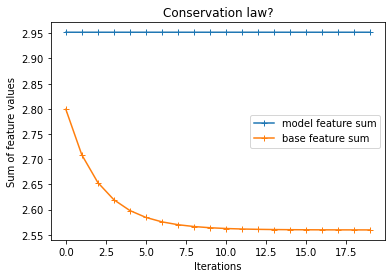

In [9]:
view_run_results("runs/test100_diff1")